<div style='background :cyan; color:black; padding: 10px; border:2px solid black; text-align:center; border-radius :5px'>
    <h1>Le modèle K-Means</h1>
</div>

<h1>Objectif :</h1>

<h3>Trouver des groupes de fleurs, sans information préalable sur le type de fleur disponible dans le dataset (de manière aveugle)</h3>
<p>Pour explorer la structure d'un dataset qui n'a pas de valeurs claires à optimiser, nous devons utiliser des techniques d'apprentissage non supervisé.  </p>

<p>Il existe plusieurs façons de regrouper des données, mais nous nous interessons au clustering K-Means qui est un algorithme de clustering populaire basé sur le centroïde.   </p>

## Fonctionnement     

<p> La méthode des kmeans repose sur <strong>la minimisation de la somme des distances euclidiennes au carré </strong>entre chaque objet (ou sujet, ou point) et le centroïde (le point central) de son cluster.</p>

<br>
<p style="text-align:center">Génération de centroides aléatoires</p>
<img src="img/centroid.png" width=40%/>

<p style="font-size:0.8em; text-align:center">Calcul de la distance euclidienne pour chaque point afin de faire des premiers regroupements</p>
<img src="img/centroid2.png" width=40%/>
<br>
<p>Une fois nos premiers clusters trouvés, on redéfinit la position des centroides en moyennant la position de chacun des points du clusters. Puis on recommence l'étape précédente afin de redéfinir nos clusters, etc...</p>

<p>Au bout de quelques itérations on ne voit plus de changements massifs dans la composition des clusters </p>
<img src="img/centroid3.png" width=40%/>
<img src="img/centroid4.png" width=40%/>

<p>Le résultat final, c’est-à-dire l’appartenance de chaque objet (ou sujet ou point) à un cluster donné peut dépendre de l’attribution initiale aléatoire des clusters qui a lieu dans la première étape de l’algorithme. </p>

<p>Pour contourner cette difficulté, il est nécessaire de lancer plusieurs fois l’algorithme et de regarder si la composition des clusters est modifiée ou non.</p>

<p>La fonction kmeans() que nous utiliseront réalise automatiquement ces multiples attributions aléatoires, et conservent  les meilleurs résultats. </p>
<br>
<p>Le K de K-Means fait référence aux nombres de clusters dans lequel nous voulons segmenter nos données.   
La partie délicate du K-Means consiste à bien choisir cette valeur K.</p>

## Imports

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Informations sur les données

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Création d'un dataset

In [3]:
# Les caractéristiques de notre études
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Standardisation des données
Avant d’employer l’approche des kmeans, il est nécessaire de standardiser (centrage réduction) les données.  

Cela aura un impact sur les performances du modèle, car cela donnera une pondération plus élevée aux variables qui ont une ampleur plus élevée.  
Par conséquent, il est toujours conseillé d'amener toutes les caractéristiques à la même échelle pour appliquer des algorithmes basés sur la distance comme KNN ou K-Means.

In [4]:
ss = StandardScaler()
df = ss.fit_transform(df)
df = pd.DataFrame(df, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


## Reduction de dimension (PCA)
Nous allons chercher des clusters avec plusieurs colonnes de données ce qui revient à placer nos centroïdes et nos points sur plusieurs dimensions. Si nous voulons visualiser nos clusters il nous faut réduire nos dimensions avec 2 features. ( ici PC1 et PC2 ) 

In [5]:
pca = PCA(n_components=2)
X = pca.fit_transform(df)
X = pd.DataFrame(X, columns=['PC1', 'PC2'])
X.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


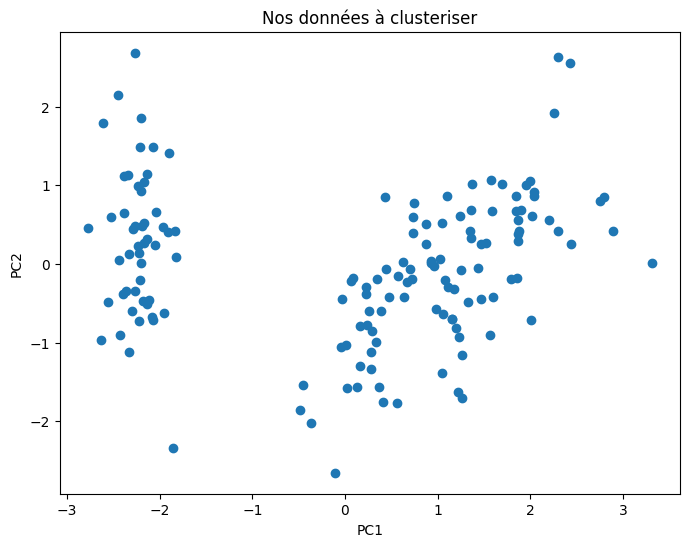

In [6]:
# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X['PC1'], X['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Nos données à clusteriser')
plt.show()

## Recherche de la valeur k

Pour trouver la valeur k nous utilisons la méthode elbow, basée sur la minimisation de la somme des carrés des écarts à l’intérieur des clusters.

In [7]:
sum_of_squared = []
for k in range(1,12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sum_of_squared.append(kmeans.inertia_) 

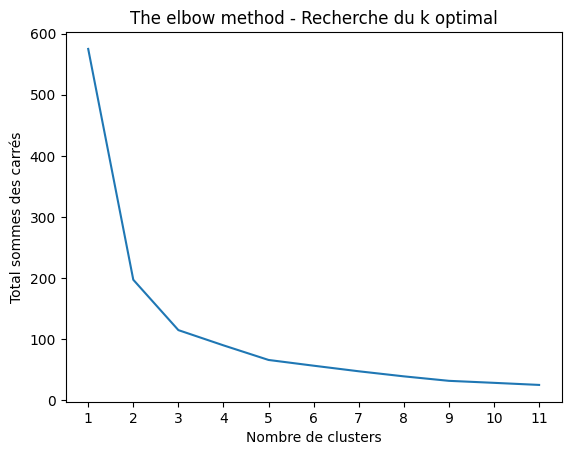

In [8]:
plt.plot(range(1, 12), sum_of_squared)
plt.xticks(range(1,12))
plt.xlabel('Nombre de clusters')
plt.ylabel('Total sommes des carrés')
plt.title('The elbow method - Recherche du k optimal')
plt.show()

Assez logiquement plus le nombre de clusters est élevé, moins les erreurs sont fortes.

L'augmentation du nombre de clusters améliore naturellement l'ajustement mais à un moment donné, cela est trop ajusté, et le coude reflète cela ( overfitting )

Nous choississons k = 3 puisque c'est à cette valeur que nous visualisons un coude ( k = 2 était un choix possible également )



## Entrainement du modèle

In [9]:
k = 3
model = KMeans(n_clusters=k)
model.fit(X)
print()
print("Voici les labels trouvés par notre modèle:\n",model.labels_)
print("Somme des erreurs au carré :",model.inertia_)


Voici les labels trouvés par notre modèle:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Somme des erreurs au carré : 115.18647050742709


## Visualisation des clusters

Text(0.5, 1.0, 'Visualisation des clusters')

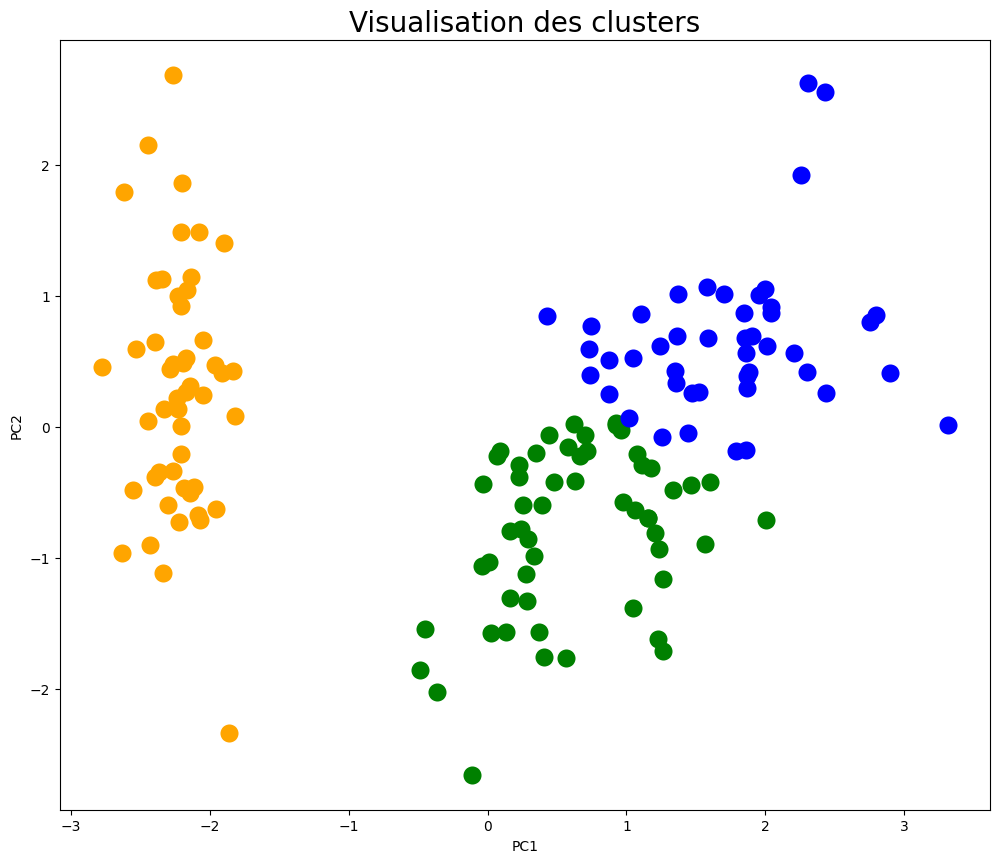

In [10]:
# Evaluate the model
plt.figure(figsize=(12, 10))
colors = ['orange','green','blue']
pred = model.predict(X)
for idx in range(3):
    plt.scatter(X[pred == idx]['PC1'], X[pred == idx]['PC2'], c = colors[idx], lw=7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisation des clusters', fontsize = 20)